<a href="https://colab.research.google.com/github/gtestault/embeddings-demo/blob/main/embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# English

## Run me first: installs dependencies (2 min)

In [ ]:
!pip install gensim

In [ ]:
!pip install whatlies

In [ ]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")
model.save("wiki.kv")

In [ ]:
from whatlies.language import GensimLanguage
from whatlies import EmbeddingSet, Embedding
lang = GensimLanguage("wiki.kv")

## Explore embeddings, similarity & analogies


In [ ]:
vec = model.get_vector("cow")
print("vector shape: {}".format(vec.shape))
print(vec)

image.png

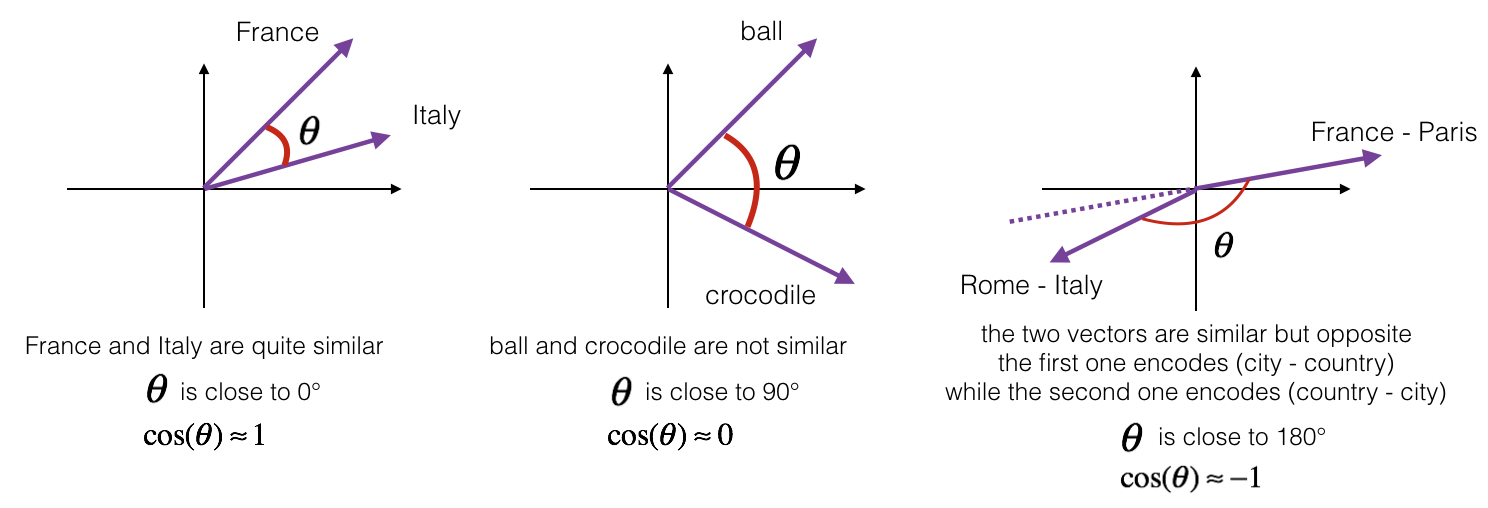
source: [Operations on word vectors by Fisseha Berhane](https://datascience-enthusiast.com/DL/Operations_on_word_vectors.html)

In [ ]:
model.similarity("yellow", "blue")

In [ ]:
model.similarity("dog", "cat")

In [ ]:
model.similarity("cow", "yellow")

In [ ]:
model.most_similar("cow")

In [ ]:
model.doesnt_match(["jump", "hide", "run", "karaoke"])

Linear algebra with word embeddings

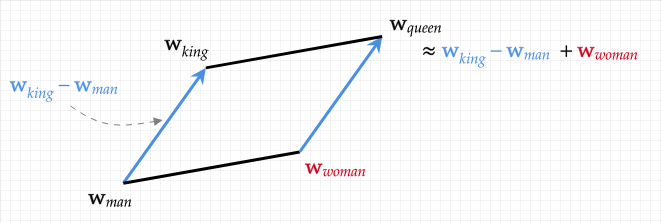

illustration source: https://www.ed.ac.uk/informatics/news-events/stories/2019/king-man-woman-queen-the-hidden-algebraic-struct


King is to man as queen is to woman

In [ ]:
model.most_similar(positive=["woman","king"], negative=["man"], topn=1)

In [ ]:
def analogy(model, A, B, C, top=None):
  if (top is not None):
    return model.most_similar(positive=[B, C], negative=[A], topn=top)
  return model.most_similar(positive=[B, C], negative=[A])

Cow is to plain as X is to ocean

Beer is to Germany as X is to Russia

In [ ]:
analogy(model, "germany", "beer", "russia", top=1)

In [ ]:
analogy(model, "cool", "coolest", "tall", top=1)

In [ ]:
analogy(model, "talk", "talked", "send", top=1)

In [ ]:
analogy(model, "germany", "berlin", "poland", top=1)

In [ ]:
analogy(model, "plain", "cow", "ocean", top=1)

In [ ]:
analogy(model, "student", "professor", "girl", top=3)

In [ ]:
analogy(model, "student", "professor", "orphan", top=3)

In [ ]:
analogy(model, "car", "porsche", "boat", top=1)

In [ ]:
analogy(model, "car", "vw", "boat", top=1)

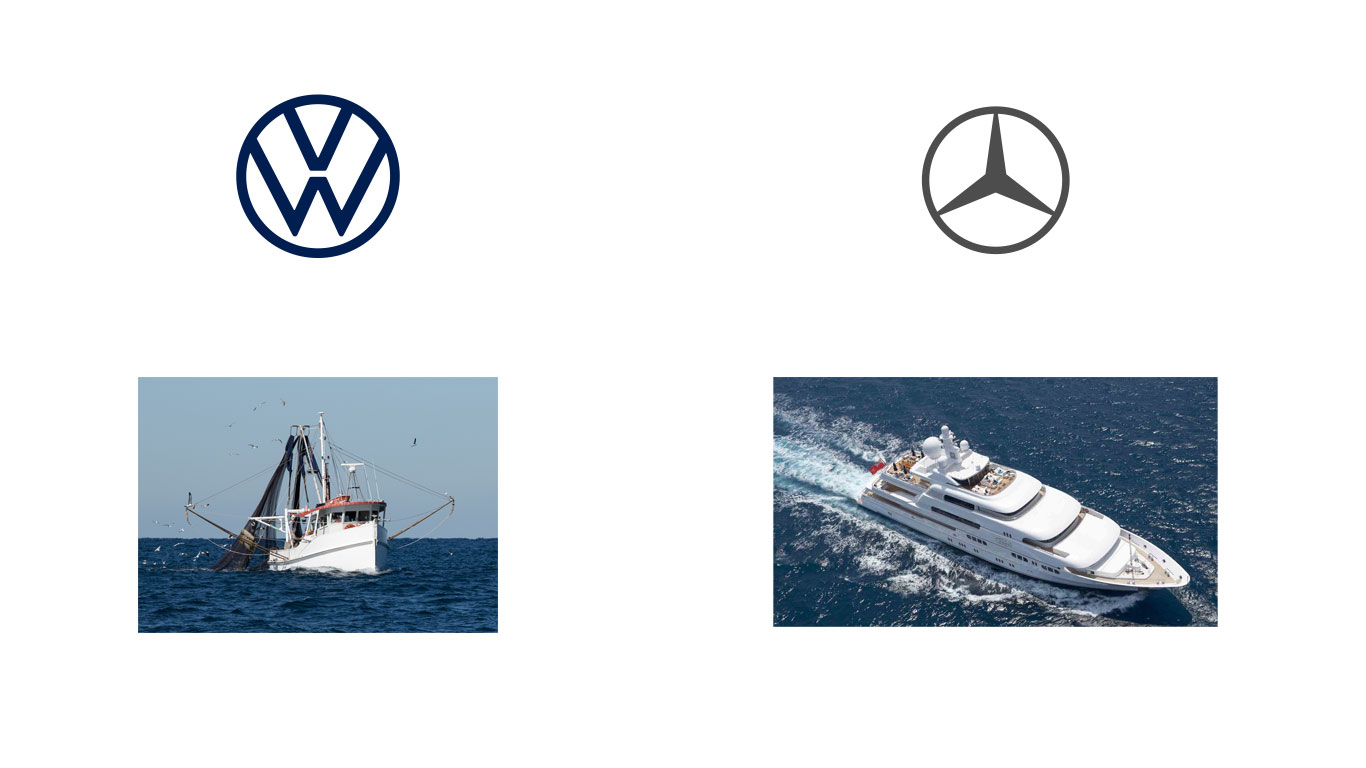

Caution: Embeddings amplify bias!

See [Rasa Algorithm Whiteboard: Measuring Bias in Word Embeddings](https://www.youtube.com/watch?v=UwAvyACOrWs) and
 [*Word Embeddings and Gender Stereotypes
in Swedish and English, Rasmus Précenth*](https://www.diva-portal.org/smash/get/diva2:1313459/FULLTEXT01.pdf)



In [ ]:
analogy(model, "father", "doctor", "mother", top=1)

## Visualize embeddings with [whatlies](https://github.com/RasaHQ/whatlies)

In [ ]:
from whatlies.transformers import Pca
#@title PCA { run: "auto" }

words = "dog cat cow yellow green black banking economy market cereal cocoa rabbit" #@param {type:"string"}
dimensions =  2#@param {type:"integer", min: 2}
#@markdown **Warning:** we need ```0 < dimensions < len(words)```
words = words.split()
print(words)
emb = lang[words].transform(Pca(dimensions))
if dimensions == 3:
  emb.plot_3d(annot=True)
elif dimensions == 2:
  emb.plot()
  emb.plot_distance()
elif dimensions > 3:
  emb.plot_pixels()

### Debiasing pretrained embeddings

In [ ]:
#@title Vector projection { run: "auto" }

words = "accountant auditor actor biochemist librarian professor cashier dancer dentist designer stuntman economist engineer farmer doctor nurse architect " #@param {type:"string"}
y_bottom = "he" #@param {type:"string"}
y_top = "she" #@param {type:"string"}
x_left = "dangerous" #@param {type:"string"}
x_right = "safe" #@param {type:"string"}
#@markdown **Warning:** we need ```0 < dimensions < len(words)```
words = words.split()
list_err = "all axis labels must be in word list"

words.extend([y_bottom, y_top, x_left, x_right])
print(words)
emb = lang[words]
x = emb[x_right] - emb[x_left]
y = emb[y_top] - emb[y_bottom]
padding = " " * 30
y.name = y_bottom + padding + y_top
x.name = x_left + padding + x_right

emb.plot(x_axis=x, axis_option="equal", y_axis=y, kind="scatter")


Problem: Job titles should be gender neutral, but in the previous projection we can see that dancer is closer to 'she' than 'he'

Possible workaround on pretrained vectors: [Hard debiasing technique](https://arxiv.org/abs/1607.06520)

We can apply a simplified version of hard debias in whatlies with the orthogonality operator of whatlies applied to: ```embedding_set | gender_direction```. 
This will set all the vectors in an embedding set orthogonal to the gender direction.

In [ ]:
gender_neutral = emb | (emb["he"] - emb["she"])
gender_neutral.plot(x_axis=x, axis_option="equal", y_axis=y, kind="scatter")

# Deutsch

## Extra: Deutsche Embeddings Spacy


funktionieren leider nicht so gut :(

In [ ]:
!python -m spacy download de_core_news_md

In [ ]:
!pip install whatlies[spacy]

noch mehr Modelle hier: https://spacy.io/models

In [ ]:
from whatlies import EmbeddingSet, Embedding
from whatlies.language import SpacyLanguage
import spacy
nlp = spacy.load("de_core_news_md")
lang = SpacyLanguage(nlp)

In [ ]:
from whatlies.transformers import Pca
#@title PCA { run: "auto" }

words = "" #@param {type:"string"}
dimensions =  3#@param {type:"integer", min: 2}
#@markdown **Warning:** we need ```0 < dimensions < len(words)```
words = words.split()
print(words)
emb = lang[words].transform(Pca(dimensions))
if dimensions == 3:
  emb.plot_3d(annot=True)
elif dimensions == 2:
  emb.plot()
  emb.plot_distance()
elif dimensions > 3:
  emb.plot_pixels()

## Extra: Deutsche Embeddings Fasttext (nicht genug RAM in gratis Colab version)


In [ ]:
!pip install fasttext
import fasttext.util
fasttext.util.download_model('de', if_exists='ignore')

In [ ]:
!pip install -U whatlies

In [ ]:
!pip install whatlies[all]

In [ ]:
from gensim.test.utils import datapath
from gensim.models.fasttext import load_facebook_vectors
vec_path = datapath("/content/cc.de.300.bin")
wv = load_facebook_vectors(vec_path)